# Import packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy as ctp
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
warnings.filterwarnings('ignore')
import os
# !!!!!!!! Attention: ensure you change the current working directory to the foler 'finse_school' that contains this git repository and the 'data' folder.
os.chdir('/Users/gao/Library/CloudStorage/OneDrive-UniversityofCambridge/research/training/202203_DEEPICE_TS1/finse_school')
# os.getcwd()

# Then you can import our self defined functions
from Finse_data_analysis.module.mapplot import (
         hemisphere_plot,
         globe_plot,
     )

# Import data

In [2]:
model_name = ['AWI-ESM-1-1-LR', 'INM-CM4-8', 'MIROC-ES2L', 'MPI-ESM1-2-LR']

pi_simulation = {}
cdo_regridded_pi_simulation = {}
lgm_simulation = {}

for i in range(len(model_name)):
    print(str(i) + '. read in files of Model ' + model_name[i])
    
    pi_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_PI_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')
    cdo_regridded_pi_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_PI_simulation_year_mean/cdo_regridded_tas_Amon_' + model_name[i] + '*.nc')
    lgm_simulation[model_name[i]] = xr.open_mfdataset('data/CMIP6_LGM_simulation_year_mean/tas_Amon_' + model_name[i] + '*.nc')

era5_t2m = xr.open_dataset('data/ERA5/cdo_regridded_t2m_era5_1979_2020_annual_mean.nc')

delta_tas_sites = pd.read_csv('data/Antarctic_site_records/inferred_delta_tas_at_Antarctic_sites_LGM_PD.csv')


0. read in files of Model AWI-ESM-1-1-LR
1. read in files of Model INM-CM4-8
2. read in files of Model MIROC-ES2L
3. read in files of Model MPI-ESM1-2-LR


In [3]:
era5_t2m

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 1999-12-16T12:00:00
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Feb 21 17:52:40 2022: cdo -remapcon2,global_1 -timmean ...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [4]:
delta_tas_sites

site    lat     lon  inferred_delta_tas
0          EDML -75.00    0.07                -8.9
1        DOME F -77.32   39.70                -7.4
2        DOME B -77.08   94.92                -8.0
3        Vostok -78.47  106.87                -7.7
4      Law Dome -66.73  112.83                -7.1
5           EDC -75.10  123.35                -8.8
6   Taylor Dome -77.80  158.72                -7.1
7         Talos -72.82  159.18                -9.3
8    Siple Dome -81.67 -148.82               -10.0
9          Byrd -80.02 -119.52                -9.4
10          WDC -79.46 -112.14               -11.9

# Visualization

ERA5 annual mean 2 meter temperature from 1979-2020

Text(0.5, 0, 'Annual mean 2m temperature [$K$] in ERA5')

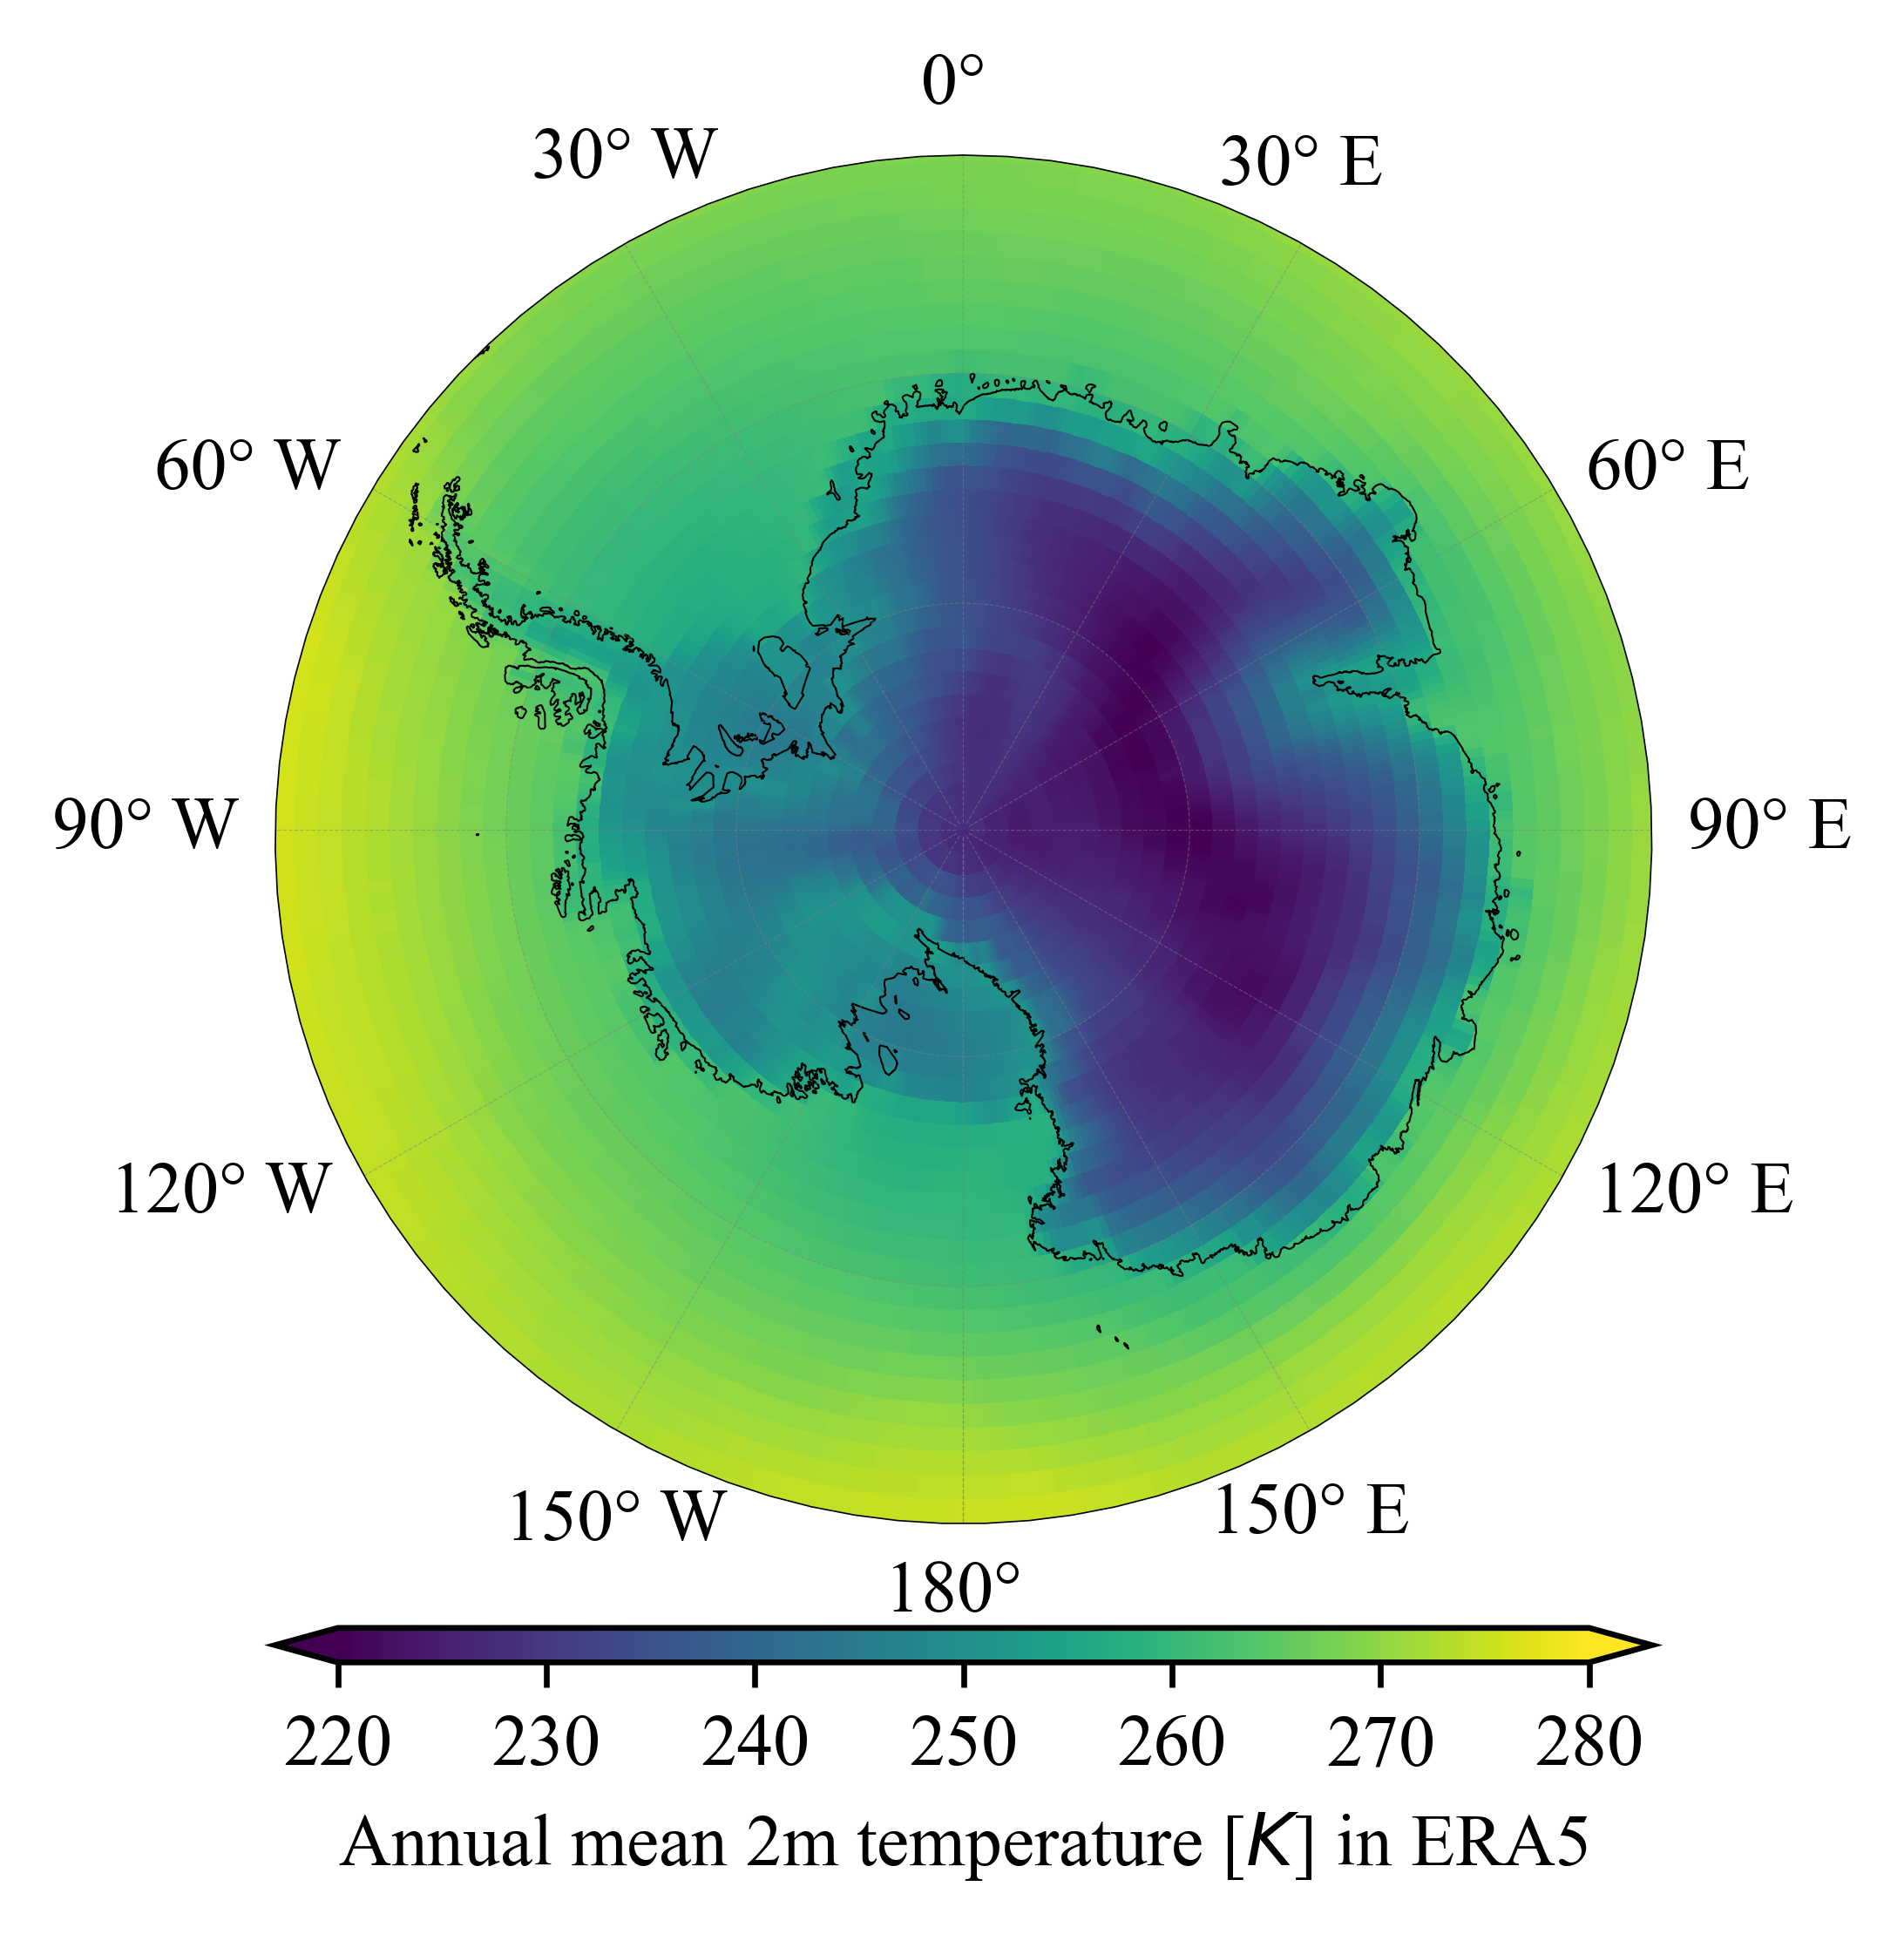

In [5]:
pltlevel = np.arange(220, 280.01, 0.2)
pltticks = np.arange(220, 280.01, 10)

fig, ax = hemisphere_plot(northextent=-60,)

plt_cmp = ax.pcolormesh(
    era5_t2m.lon,
    era5_t2m.lat,
    era5_t2m.t2m.squeeze(),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
    cmap=cm.get_cmap('viridis', len(pltlevel)),
    transform=ctp.crs.PlateCarree(),
)

cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal", pad=0.02,
    fraction=0.16, shrink=1, aspect=40, anchor=(0.5, 0.7),
    ticks=pltticks, extend='both')
cbar.ax.set_xlabel(
    'Annual mean 2m temperature [$K$] in ERA5',
    linespacing=1.5
)

Difference between PI simulations and ERA5

0-0: plot AWI-ESM-1-1-LR
0-1: plot INM-CM4-8
1-0: plot MIROC-ES2L
1-1: plot MPI-ESM1-2-LR


Text(0.5, 0, 'Annual mean 2m temperature [$K$]\nDifference between PI simulation and ERA5')

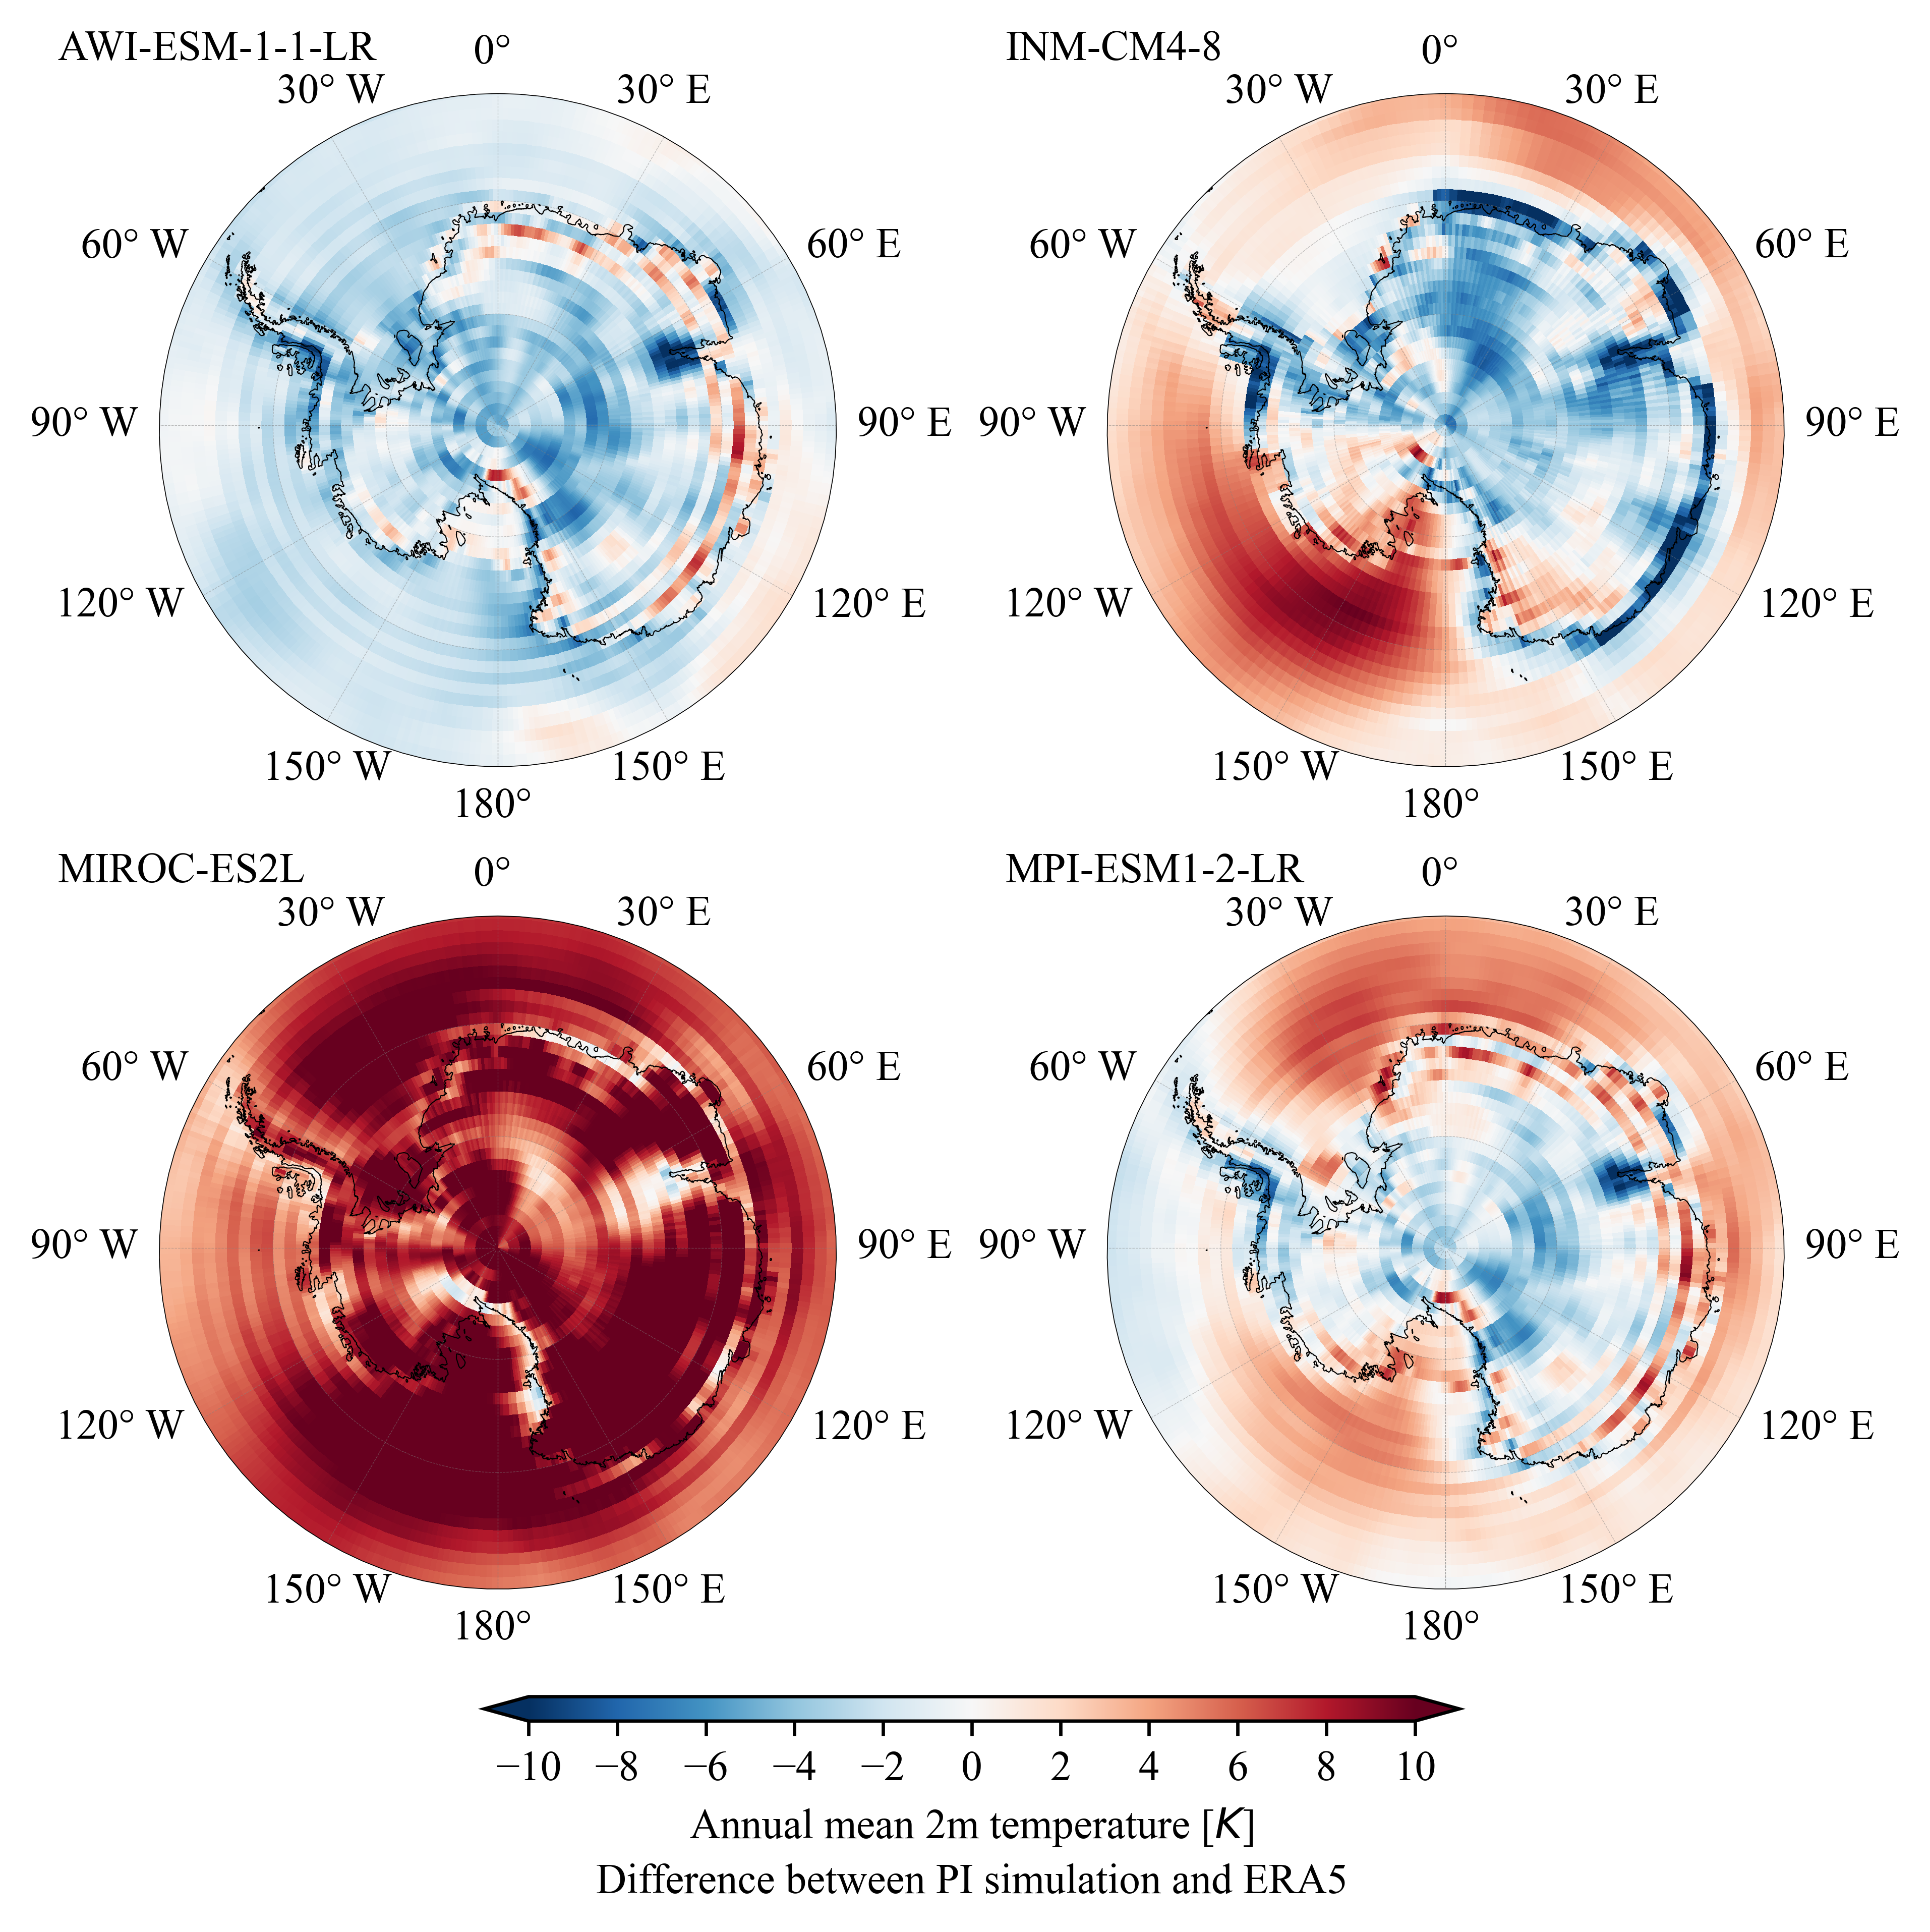

In [6]:
# We will create a figure with four panels, one for each model
nrow = 2
ncol = 2

# here we define the color bar properties.
pltlevel = np.arange(-10, 10.01, 0.01)
pltticks = np.arange(-10, 10.01, 2)


fig, axs = plt.subplots(
    nrow, ncol, figsize=np.array([8.8*ncol, 9.3*nrow + 2]) / 2.54,
    subplot_kw={'projection': ctp.crs.SouthPolarStereo()},
    gridspec_kw={'hspace': 0.12, 'wspace': 0.4},
    )

for i in range(nrow):
    for j in range(ncol):
        print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        axs[i, j] = hemisphere_plot(northextent=-60, ax_org = axs[i, j])
        
        plt_cmp = axs[i, j].pcolormesh(
            era5_t2m.lon,
            era5_t2m.lat,
            cdo_regridded_pi_simulation[model_name[i * 2 + j]].tas.squeeze() - \
                era5_t2m.t2m.squeeze(),
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('RdBu', len(pltlevel)).reversed(),
            transform=ctp.crs.PlateCarree(),
        )
        
        axs[i, j].text(
            -0.15, 1.05, model_name[i * 2 + j],
            transform=axs[i, j].transAxes)

cbar = fig.colorbar(
    plt_cmp, ax=axs, orientation="horizontal", pad=0.02,
    fraction=0.14, shrink=0.6, aspect=40, anchor=(0.5, 0.7),
    ticks=pltticks, extend='both')
cbar.ax.set_xlabel(
    'Annual mean 2m temperature [$K$]\nDifference between PI simulation and ERA5',
    linespacing=1.5
)
# Sorry for the bloody plot with MIROC-ES2L

0-0: plot AWI-ESM-1-1-LR
0-1: plot INM-CM4-8
1-0: plot MIROC-ES2L
1-1: plot MPI-ESM1-2-LR


Text(0.5, 0, 'Annual mean 2m temperature [$K$]\nDifference between LGM and PI simulation')

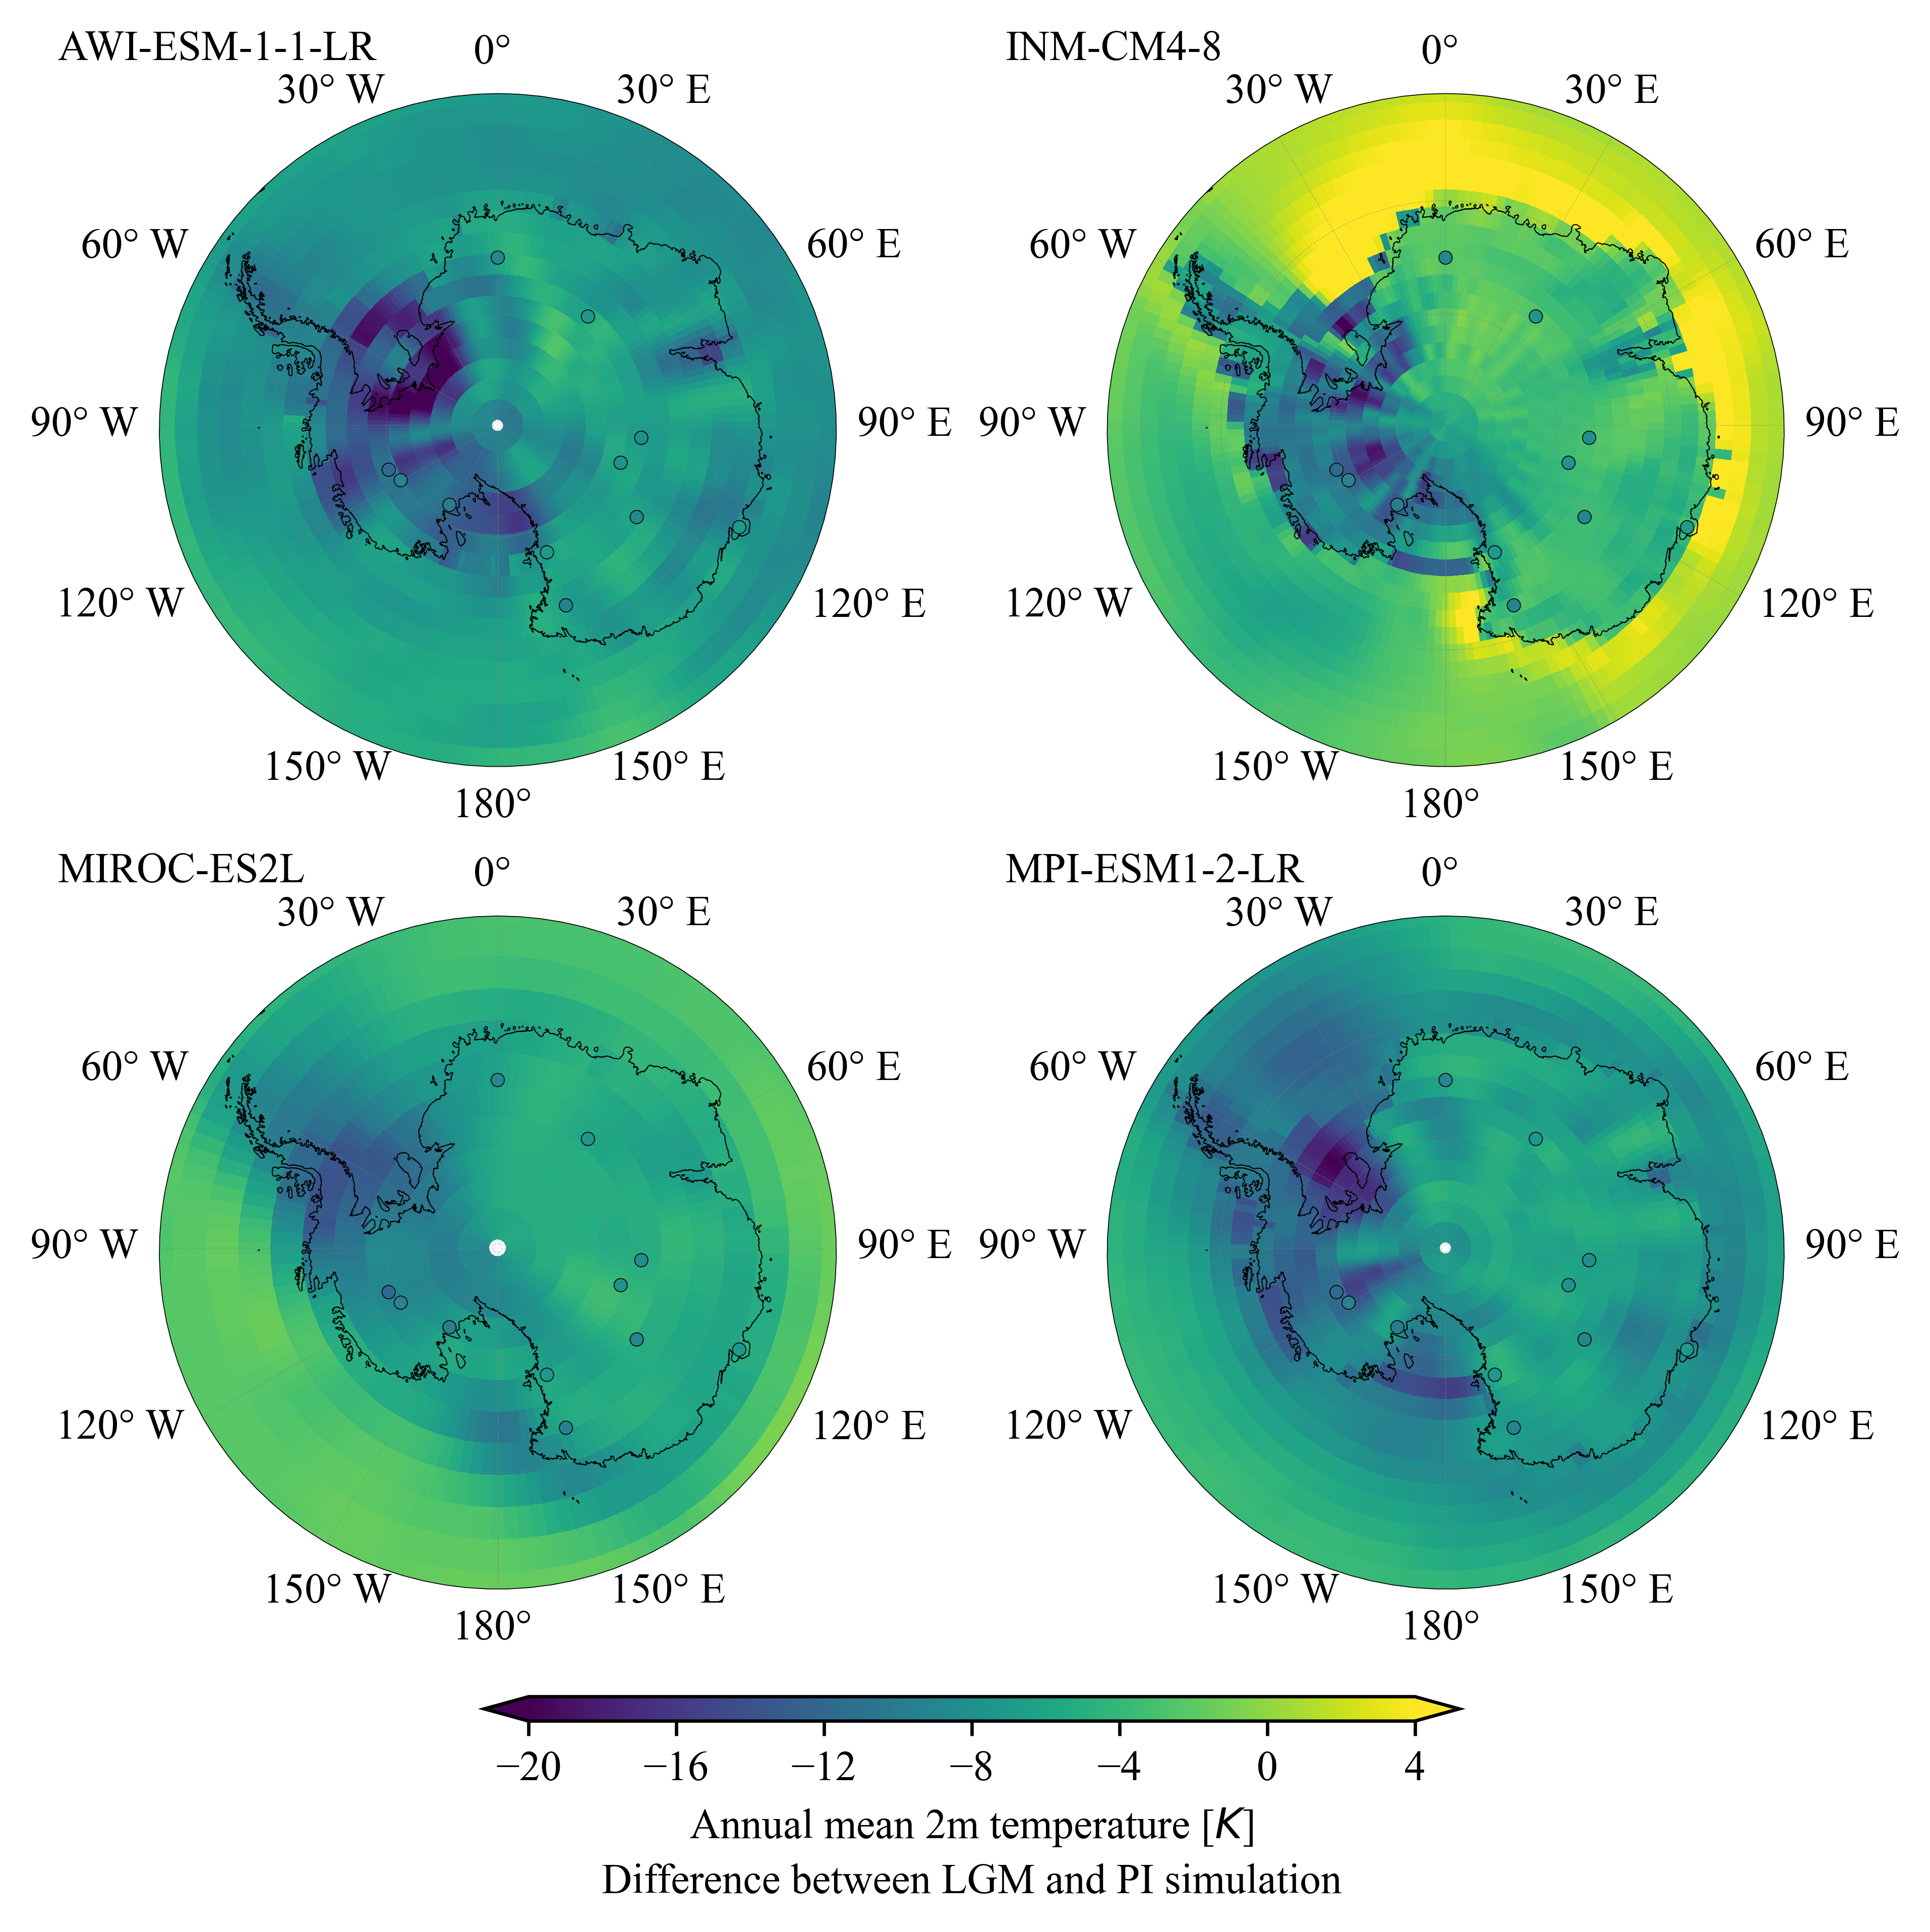

In [9]:
# We will create a figure with four panels, one for each model
nrow = 2
ncol = 2

# here we define the color bar properties.
pltlevel = np.arange(-20, 4.01, 0.01)
pltticks = np.arange(-20, 4.01, 4)


fig, axs = plt.subplots(
    nrow, ncol, figsize=np.array([8.8*ncol, 9.3*nrow + 2]) / 2.54,
    subplot_kw={'projection': ctp.crs.SouthPolarStereo()},
    gridspec_kw={'hspace': 0.12, 'wspace': 0.4},
    )

for i in range(nrow):
    for j in range(ncol):
        print(str(i) + '-' + str(j) + ': plot ' + model_name[i * 2 + j])
        axs[i, j] = hemisphere_plot(northextent=-60, ax_org = axs[i, j])
        
        plt_cmp = axs[i, j].pcolormesh(
            lgm_simulation[model_name[i * 2 + j]].lon,
            lgm_simulation[model_name[i * 2 + j]].lat,
            lgm_simulation[model_name[i * 2 + j]].tas.mean(axis=0) - \
                pi_simulation[model_name[i * 2 + j]].tas.mean(axis=0),
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('viridis', len(pltlevel)),
            transform=ctp.crs.PlateCarree(),
        )
        
        # ax.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
        axs[i, j].scatter(
            x = delta_tas_sites.lon, y = delta_tas_sites.lat,
            s=10, linewidths=0.2,
            c = delta_tas_sites.inferred_delta_tas, marker='o',
            norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel)),
            cmap=cm.get_cmap('viridis', len(pltlevel)),
            transform=ctp.crs.PlateCarree(), edgecolors = 'black',
        )
        
        axs[i, j].text(
            -0.15, 1.05, model_name[i * 2 + j],
            transform=axs[i, j].transAxes)

cbar = fig.colorbar(
    plt_cmp, ax=axs, orientation="horizontal", pad=0.02,
    fraction=0.14, shrink=0.6, aspect=40, anchor=(0.5, 0.7),
    ticks=pltticks, extend='both')
cbar.ax.set_xlabel(
    'Annual mean 2m temperature [$K$]\nDifference between LGM and PI simulation',
    linespacing=1.5
)